In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [36]:
# read the files
file_paths = {
    2023: 'Datasets/2023 Pollution Inventory Dataset V2.xlsx',
    2022: 'Datasets/2022 Pollution Inventory Dataset V2.xlsx',
    2021: 'Datasets/2021 Pollution Inventory Dataset.xlsx',
    2020: 'Datasets/2020 Pollution Inventory Dataset V2.xlsx',
    2019: 'Datasets/2019 Pollution Inventory Dataset V2.xlsx',
    2018: 'Datasets/2018 Pollution Inventory.xlsx',
    2017: 'Datasets/2017 Pollution Inventory Dataset.xlsx',
    2016: 'Datasets/2016 Pollution Inventory dataset - version 2.xlsx'
}
skiprows = 9
sheet_name = {2016: 1}  # treat 2016 specially

dfs = {}

for year, path in file_paths.items():
    dfs[year] = pd.read_excel(path, skiprows=skiprows, sheet_name=sheet_name.get(year, 0))

# check the columns
columns_check = {year: df.columns for year, df in dfs.items()}
columns_check


{2023: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'REGULATED INDUSTRY SECTOR',
        'REGULATED INDUSTRY SUB SECTOR'],
       dtype='object'),
 2022: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'REGULATED INDUSTRY SECTOR',
        'REGULATED INDUSTRY SUB SECTOR'],
       dtype='object'),
 2021: Index(['AUTHORISATION ID / PERMIT ID', 'ACTIVITY DESCRIPTION', 'OPERATOR NAME',
        'SITE ADDRESS', 'SITE POSTCODE', 'EASTING', 'NORTHING', 'EA AREA NAME',
        'ROUTE NAME', 'SUBSTANCE NAME', 'REPORTING THRESHOLD (kg)',
        'QUANTITY RELEASED (kg)', 'RE

In [37]:
dfs[2017]

,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR
0,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Methane,10000.00000,141000,Landfill,Non Hazardous Landfill
1,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Nitrogen oxides (NO and NO2) as NO2,100000.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
2,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Tetrachloroethane (1,1,2,2-Tetrachloroethane)",10.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
3,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,"Butadiene (1,3-Butadiene)",100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
4,BU0834IP,"WASTE LANDFILLING; >10 T/D WITH CAPACITY >25,0...",Waste Recycling Group (Central) Limited,Edwin Richards Quarry EDWIN RICHARDS LANDFILL ...,B65 9BT,396500.0,288200.0,West Midlands,Air,Tetrachloroethylene (PER),100.00000,Below Reporting Threshold,Landfill,Non Hazardous Landfill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31964,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Nickel,10.00000,Below Reporting Threshold,EfW,EfW
31965,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Chlorine and inorganic chlorine compounds - as...,10000.00000,Below Reporting Threshold,EfW,EfW
31966,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Fluorine and inorganic fluorine compounds - as HF,1000.00000,Below Reporting Threshold,EfW,EfW
31967,BP3736HA,THE INCINERATION OF NON-HAZARDOUS WASTE IN AN ...,Veolia Bioenergy UK Limited,Chilton BioMass Plant Chilton Industrial Estat...,DL170SD,428140.0,530390.0,North East,Air,Non-methane volatile organic compounds (NMVOCs),10000.00000,Below Reporting Threshold,EfW,EfW


In [38]:
# Save the results processed each year
heptachlor_data = {}

for year, df in dfs.items():
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR'].copy()
    df_filtered = df_filtered[df_filtered['QUANTITY RELEASED (kg)'].str.upper() != 'BELOW REPORTING THRESHOLD']
    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])
    heptachlor_data[year] = df_filtered


In [39]:
summary_stats = []

for year in years:
    df = heptachlor_data.get(year)
    all_data = dfs[year]
    
    if df is None or df.empty:
        continue  # If there is no valid data for that year, skip the statistics
    
    quantity = df['QUANTITY RELEASED (kg)']
    reporting_thresholds = df['REPORTING THRESHOLD (kg)'].dropna().unique()
    
    stats = {
        'Year': year,
        'Total Quantity Released': quantity.sum(),
        'Mean': quantity.mean(),
        'Standard deviation': quantity.std(),
        'Min': quantity.min(),
        'Max': quantity.max(),
        '5th Percentile': np.percentile(quantity, 5),
        '10th Percentile': np.percentile(quantity, 10),
        '25th Percentile': np.percentile(quantity, 25),
        '50th Percentile': np.percentile(quantity, 50),
        '75th Percentile': np.percentile(quantity, 75),
        '90th Percentile': np.percentile(quantity, 90),
        '95th Percentile': np.percentile(quantity, 95),
        'Reporting Threshold': reporting_thresholds[0] if len(reporting_thresholds) > 0 else np.nan,
        'Nb of Obs': len(df),
        'NB of obs below reporting threshold': sum(
            (all_data['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR') &
            (all_data['QUANTITY RELEASED (kg)'].astype(str).str.upper() == 'BELOW REPORTING THRESHOLD')
        ),
        'Nb of different sites': df['EA AREA NAME'].nunique(),
        'Mean nb years per sites': df['EA AREA NAME'].value_counts().mean()
    }
    
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df


,Year,Total Quantity Released,Mean,Standard deviation,Min,Max,5th Percentile,10th Percentile,25th Percentile,50th Percentile,75th Percentile,90th Percentile,95th Percentile,Reporting Threshold,Nb of Obs,NB of obs below reporting threshold,Nb of different sites,Mean nb years per sites
0,2019,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.0,1,56,1,1.0
1,2020,2.31693,2.31693,NaN,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,2.31693,0.1,1,55,1,1.0


In [40]:
for year in years:
    print(f"{year}: {len(heptachlor_data.get(year, []))} observations")


2016: 0 observations
2017: 0 observations
2018: 0 observations
2019: 1 observations
2020: 1 observations
2021: 0 observations
2022: 0 observations
2023: 0 observations


In [41]:
# Merge the data of all years (including the records of Below Threshold)
df_all_years = pd.concat([
    df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR'].copy().assign(Year=year)
    for year, df in dfs.items()
], ignore_index=True)


df_all_years['Above_Threshold'] = df_all_years['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD'

# Convert the legal values to numerical types
df_all_years['QUANTITY RELEASED (kg)'] = pd.to_numeric(
    df_all_years['QUANTITY RELEASED (kg)'], errors='coerce'
)

# extract the valid data
df_valid = df_all_years[df_all_years['Above_Threshold'] & df_all_years['QUANTITY RELEASED (kg)'].notna()]

# summary stats
summary_stats = {
    'Total Quantity Released': df_valid['QUANTITY RELEASED (kg)'].sum(),
    'Mean': df_valid['QUANTITY RELEASED (kg)'].mean(),
    'Standard deviation': df_valid['QUANTITY RELEASED (kg)'].std(),
    'Min': df_valid['QUANTITY RELEASED (kg)'].min(),
    'Max': df_valid['QUANTITY RELEASED (kg)'].max(),
    '5th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.05),
    '10th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.10),
    '25th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.25),
    '50th Percentile': df_valid['QUANTITY RELEASED (kg)'].median(),
    '75th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.75),
    '90th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.90),
    '95th Percentile': df_valid['QUANTITY RELEASED (kg)'].quantile(0.95),
    'Reporting threshold / EQS [if relevant]': df_valid['REPORTING THRESHOLD (kg)'].dropna().unique()[0]
        if not df_valid['REPORTING THRESHOLD (kg)'].dropna().empty else None,
    'Nb of Obs': len(df_all_years),
    'NB of obs below reporting threshold': (~df_all_years['Above_Threshold']).sum(),
    'Nb of different sites': df_all_years['SITE ADDRESS'].nunique(),
    'Mean nb years per sites': df_all_years.groupby('SITE ADDRESS')['Year'].nunique().mean()
}

# convert to dataframe
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index', columns=['Value'])
summary_df


,Value
Total Quantity Released,2.316930
Mean,1.158465
Standard deviation,1.638317
Min,0.000000
Max,2.316930
5th Percentile,0.115847
10th Percentile,0.231693
25th Percentile,0.579233
50th Percentile,1.158465
75th Percentile,1.737698


In [44]:
# Clean the "ROUTE NAME" field
df_all_years['ROUTE NAME'] = df_all_years['ROUTE NAME'].astype(str).str.strip()

# Count the number of each ROUTE type
route_counts = df_all_years['ROUTE NAME'].value_counts()

# Obtain the percentage of a specific category
total = route_counts.sum()
wastewater_pct = route_counts.get('Wastewater', 0) / total * 100
controlled_waters_pct = route_counts.get('Controlled Waters', 0) / total * 100

print(f"Percentage of Heptachlor in Wastewater: {wastewater_pct:.2f}%")
print(f"Percentage of Heptachlor in Controlled Waters: {controlled_waters_pct:.2f}%")

Percentage of Heptachlor in Wastewater: 61.48%
Percentage of Heptachlor in Controlled Waters: 12.84%


In [23]:
from collections import defaultdict

# Get all the area names that have appeared (complete set)
all_regions = set()
for df in heptachlor_data.values():
    all_regions.update(df['EA AREA NAME'].dropna().unique())

# Initialize the annual regional frequency statistics table
region_share_clean = []

for year in years:
    df = heptachlor_data.get(year)
    row = {'Year': year}
    
    if df is None or df.empty:
        for region in all_regions:
            row[region] = 0.0
    else:
        total = len(df)
        counts = df['EA AREA NAME'].value_counts()
        for region in all_regions:
            row[region] = round((counts.get(region, 0) / total) * 100, 2)
    
    region_share_clean.append(row)
    

region_df_clean = pd.DataFrame(region_share_clean).set_index('Year').sort_index()
region_df_clean


,Thames,"Devon, Cornwall and the Isles of Scilly"
Year,,
2016,0.0,0.0
2017,0.0,0.0
2018,0.0,0.0
2019,100.0,0.0
2020,0.0,100.0
2021,0.0,0.0
2022,0.0,0.0
2023,0.0,0.0


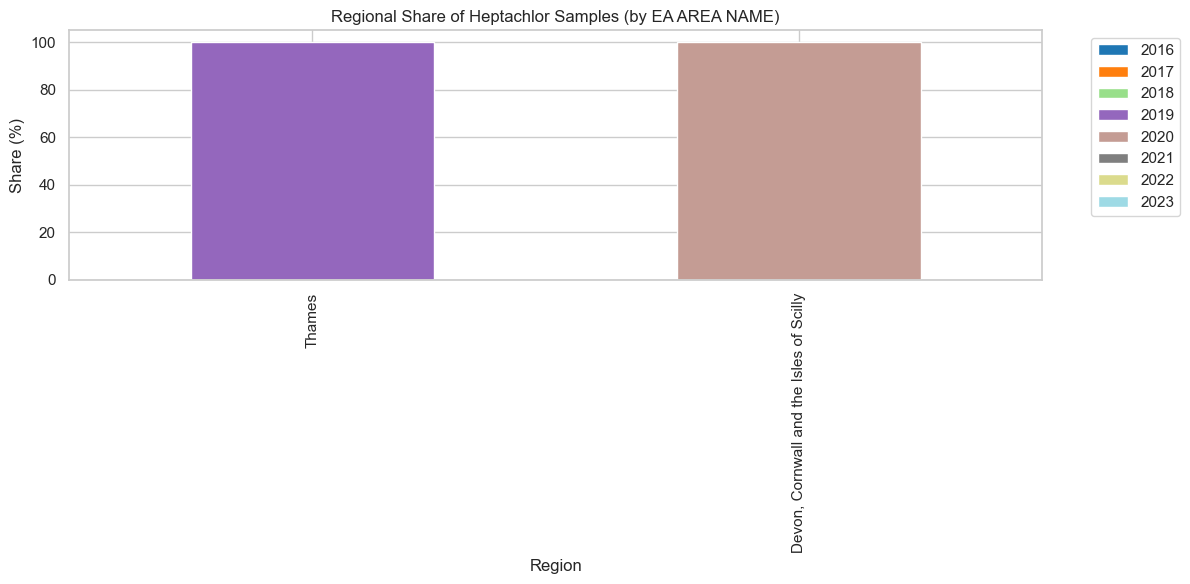

In [20]:
region_df_T = region_df.T
region_df_T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Regional Share of Heptachlor Samples (by EA AREA NAME)")
plt.ylabel("Share (%)")
plt.xlabel("Region")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


In [46]:
# Count the frequency of Heptachlor occurrence each year 
# (including all records, regardless of whether they are "Below Reporting Threshold" or not)
heptachlor_freq = []

heptachlor_freq = []

for year in years:
    df = dfs[year]
    total_records = df.shape[0]  
    hepta_count = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR'].shape[0]  # count of Heptachlor
    percent = (hepta_count / total_records * 100) if total_records > 0 else 0
    heptachlor_freq.append({
        'Year': year,
        'Heptachlor Frequency': hepta_count,
        'Percentage (%)': round(percent, 4)
    })

heptachlor_freq_df = pd.DataFrame(heptachlor_freq).set_index('Year')
heptachlor_freq_df


heptachlor_freq_df = pd.DataFrame(heptachlor_freq).set_index('Year')
heptachlor_freq_df




,Heptachlor Frequency,Percentage (%)
Year,,
2016,39,0.1229
2017,36,0.1126
2018,49,0.0047
2019,57,0.1734
2020,56,0.1764
2021,63,0.1948
2022,56,0.1778
2023,49,0.1627


In [52]:
# Merge the area

ea_to_region = {
    'North East': 'North East',
    'Cumbria and Lancashire': 'North West',
    'Greater Manchester Merseyside and Cheshire': 'North West',
    'Yorkshire': 'Yorkshire and the Humber',
    'Lincolnshire and Northamptonshire': 'East Midlands',
    'East Midlands': 'East Midlands',
    'West Midlands': 'West Midlands',
    'East Anglia': 'East of England',
    'Hertfordshire and North London': 'London',
    'Kent, South London and East Sussex': 'South East',
    'Solent and South Downs': 'South East',
    'Thames': 'South East',
    'Wessex': 'South West',
    'Devon, Cornwall and the Isles of Scilly': 'South West'
}

# Add the merged column "REGION_AGG" in all annual data boxes
for year, df in dfs.items():
    dfs[year]['REGION_AGG'] = df['EA AREA NAME'].map(ea_to_region)



In [60]:
# Count the total occurrence frequency of each region in all years (including Below Threshold)
region_total_occurrence = region_freq_df.sum().astype(int)

# Merge the valid records of all years
df_all_valid = pd.concat([
    df[(df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR') &
       (df['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD')]
    for df in dfs.values()
], ignore_index=True)

df_all_valid['QUANTITY RELEASED (kg)'] = pd.to_numeric(
    df_all_valid['QUANTITY RELEASED (kg)'], errors='coerce'
)
df_all_valid = df_all_valid.dropna(subset=['REGION_AGG', 'QUANTITY RELEASED (kg)'])

region_total_quantity = df_all_valid.groupby('REGION_AGG')['QUANTITY RELEASED (kg)'].sum()

region_percent_quantity = (region_total_quantity / region_total_quantity.sum() * 100).round(2)

combined_region_stats = pd.DataFrame({
    'Total Heptachlor Occurrences': region_total_occurrence,
    'Valid Quantity Released (kg)': region_total_quantity,
    'Valid Quantity %': region_percent_quantity
}).fillna(0).astype({'Total Heptachlor Occurrences': int})

combined_region_stats = combined_region_stats.sort_values(by='Valid Quantity Released (kg)', ascending=False)
combined_region_stats


,Total Heptachlor Occurrences,Valid Quantity Released (kg),Valid Quantity %
South West,14,2.31693,100.0
East Midlands,55,0.00000,0.0
East of England,46,0.00000,0.0
London,7,0.00000,0.0
North East,39,0.00000,0.0
North West,99,0.00000,0.0
South East,36,0.00000,0.0
West Midlands,44,0.00000,0.0
Yorkshire and the Humber,65,0.00000,0.0


#Regional frequency stacked bar chart (include below threshold)

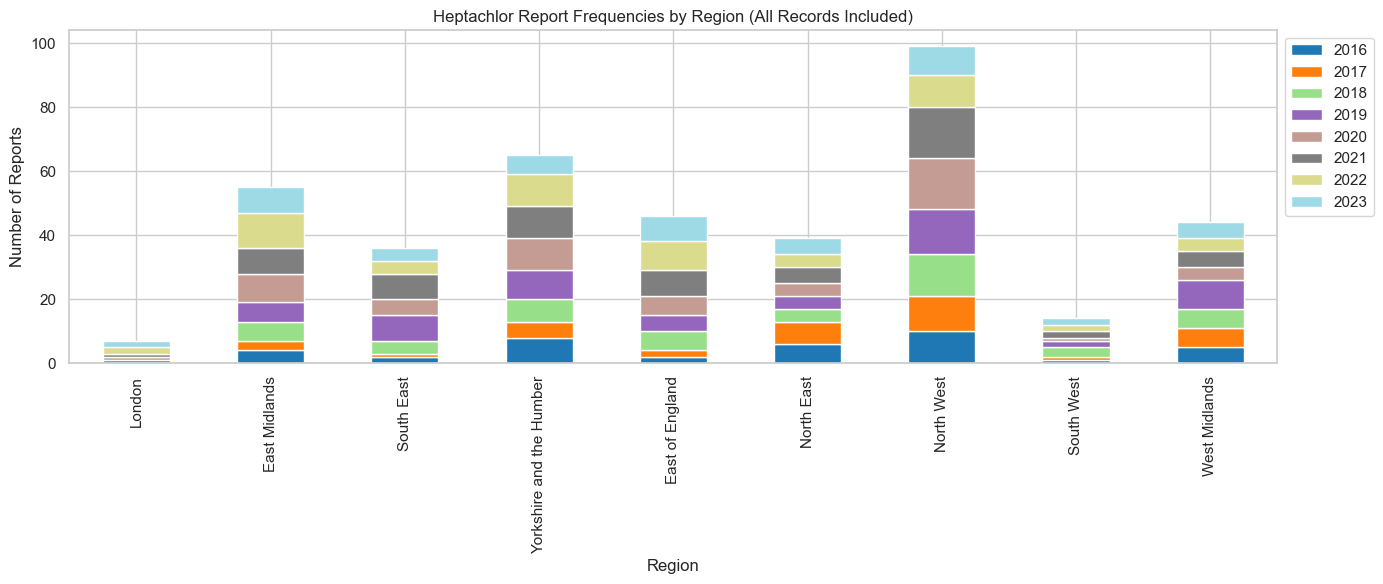

In [54]:
region_freq_df.T.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Heptachlor Report Frequencies by Region (All Records Included)")
plt.ylabel("Number of Reports")
plt.xlabel("Region")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

In [55]:
# The frequency of the OPERATOR NAME for all records 
# (including "Below Reporting Threshold")
operator_all = {}

for year in years:
    df = dfs[year]
    df_filtered = df[df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR']
    
    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_all[year] = op_counts

# Merge all years to construct the total frequency matrix
df_op_all = pd.DataFrame(operator_all).fillna(0).astype(int).T
df_op_all.index.name = 'Year'
df_op_all


,3C Waste Limited,ALAB ENVIRONMENTAL SERVICES LIMITED,Ainsworth; Ainsworth,BKP Waste & Recycling Limited,Biffa Waste Services Limited,Biffa Waste Services Ltd,Bradley Park Waste Management Limited,Britvic Soft Drinks Plc,CLEANSING SERVICE GROUP LTD,Catplant Quarry Ltd,...,Viridor Waste Management Limited,WESTCOMBE WASTE LTD,Waste Recycling Group (Central) Limited,Waste Recycling Group (Yorkshire) Limited,Water Hall (England) Ltd,Welbeck Waste Management Ltd,Whitehead Restoration Ltd,Whitemoss Landfill Holdings Limited,Woodford Waste Management Services Limited,Woods Waste Limited
Year,,,,,,,,,,,,,,,,,,,,,
2016,2,1,0,0,0,0,2,0,2,1,...,0,0,2,1,1,1,0,0,0,2
2017,2,5,0,0,0,0,2,0,1,1,...,0,0,1,0,0,0,0,0,0,2
2018,2,4,1,0,0,1,2,0,0,1,...,1,0,1,1,0,1,0,0,0,2
2019,2,4,1,3,0,0,2,0,0,1,...,2,0,1,1,0,1,1,0,0,2
2020,2,4,0,3,1,0,1,0,1,1,...,4,0,1,1,0,1,1,0,0,2
2021,2,4,0,3,0,0,2,1,0,1,...,6,1,1,1,0,1,1,1,0,2
2022,2,5,0,1,0,0,2,1,0,1,...,6,0,1,1,0,1,1,0,0,3
2023,2,2,0,1,0,0,2,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [56]:
# Only include the frequency of OPERATOR names that exceed the Threshold 
# (i.e., excluding "Below Reporting Threshold")
operator_above = {}

for year in years:
    df = dfs[year]
    df_filtered = df[
        (df['SUBSTANCE NAME'].str.upper() == 'HEPTACHLOR') &
        (df['QUANTITY RELEASED (kg)'].astype(str).str.upper() != 'BELOW REPORTING THRESHOLD')
    ]
    
    # Numerical processing
    df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['QUANTITY RELEASED (kg)'])

    op_counts = df_filtered['OPERATOR NAME'].value_counts()
    op_counts.name = year
    operator_above[year] = op_counts

df_op_above = pd.DataFrame(operator_above).fillna(0).astype(int).T
df_op_above.index.name = 'Year'
df_op_above


/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_90946/3848819170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')
/var/folders/v4/ll7l29sx2k52mk2_vs_zrm_40000gn/T/ipykernel_90946/3848819170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['QUANTITY RELEASED (kg)'] = pd.to_numeric(df_filtered['QUANTITY RELEASED (kg)'], errors='coerce')


,Veolia Environmental Services West Berkshire Ltd,Viridor Waste Management Limited
Year,,
2016,0,0
2017,0,0
2018,0,0
2019,1,0
2020,0,1
2021,0,0
2022,0,0
2023,0,0


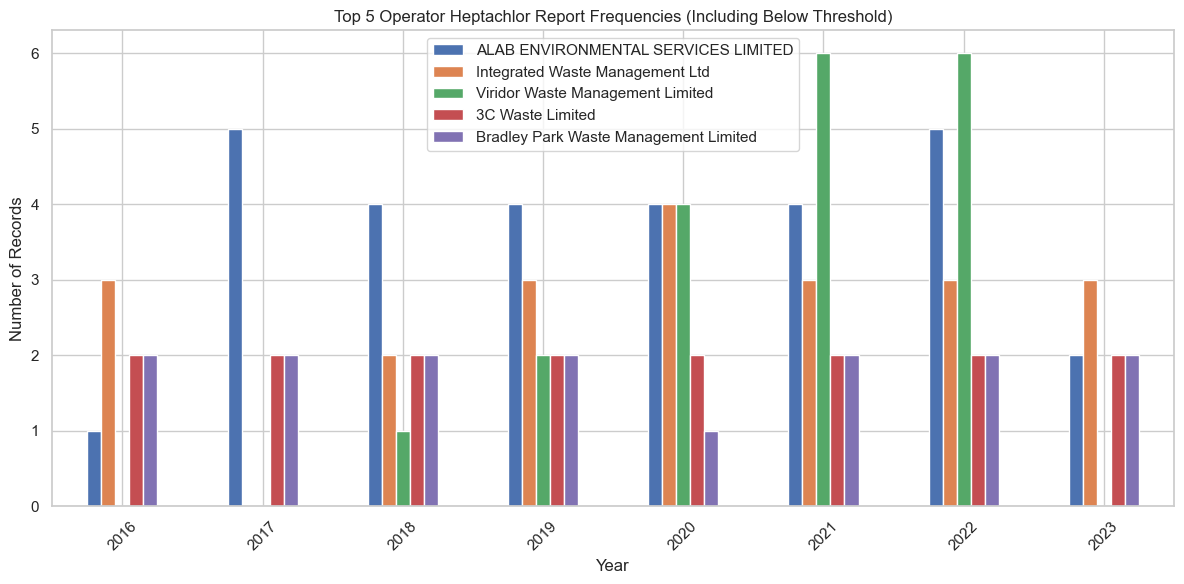

In [27]:
# Identify the top 5 enterprises with the highest overall frequency
top_operators = df_op_all.sum().sort_values(ascending=False).head(5).index

# Extract the time series of these several enterprises
df_op_all[top_operators].plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 Operator Heptachlor Report Frequencies (Including Below Threshold)")
plt.ylabel("Number of Records")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
